# Stacks
A **stack** is a linear (non-primitive) data structure in which elements are inserted and deleted only from **one side**. This pointer allows us to keep track of the last element present in the stack.

Stacks are based on the **LIFO (Last In First Out)** principle, which states that <ins>the element inserted at the last is the first element to come out.</ins>

## Applications
- 可用于Arrays或Linked Lists
- 常用于解决recursion相关的问题
- 以及其他情况，如：
    - 根据 "后入先出" 这个特点可以临时保存一些数据，之后用到依次再弹出来，常用于Depth First Search (DFS) 深度搜索
    - during function calls, converting an Infix to Postfix, 

## Operations:
- empty() – Returns whether the stack is empty – Time Complexity: O(1)
- size() – Returns the size of the stack – Time Complexity: O(1)
- top() – Returns a reference to the topmost element of the stack – Time Complexity: O(1)
- push(a) – Inserts the element ‘a’ at the top of the stack – Time Complexity: O(1)
- pop() – Deletes the topmost element of the stack – Time Complexity: O(1)
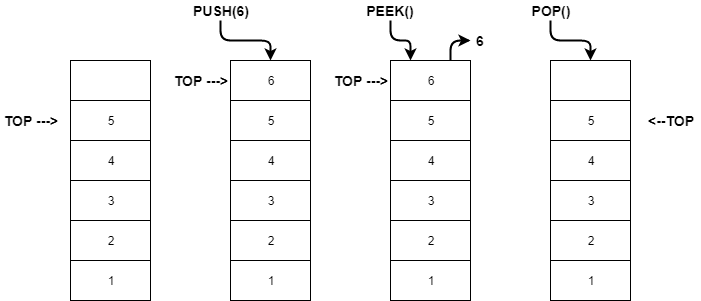

## Implementation
有几种implement的方式：
- list
- Collections.deque
- queue.LifoQueue

- singly linked list

### Implementation using list:
在使用list时，用`append()`（而不是`push()`）来add elements to the top of stack, 用`pop()`来remove the element in LIFO order

但用list的缺点是，如果stack的size越大，运行速度越慢

In [8]:
stack = []
 
# append() function to push
# element in the stack
stack.append('a')
stack.append('b')
stack.append('c')
 
print('Initial stack')
print(stack)
 
# pop() function to pop
# element from stack in
# LIFO order
print('\nElements popped from stack:')
print(stack.pop())
print(stack.pop())
print(stack.pop())
 
print('\nStack after elements are popped:')
print(stack)

Initial stack
['a', 'b', 'c']

Elements popped from stack:
c
b
a

Stack after elements are popped:
[]


### Implementation using collections.deque
当我们需要<ins>quicker append and pop operations from both the ends of the container时</ins>，用collection.deque会比用list更好；

**Deque** is an optimal version of list used for inserting and removing items. It can add/remove items from either start or the end of the list.

用deque的append和pop只需要O(1)， 而list需要O(n)


In [9]:
from collections import deque
 
stack = deque()

# append() function to push
# element in the stack
stack.append('a')
stack.append('b')
stack.append('c')
 
print('Initial stack:')
print(stack)
 
# pop() function to pop
# element from stack in
# LIFO order
print('\nElements popped from stack:')
print(stack.pop())
print(stack.pop())
print(stack.pop())
 
print('\nStack after elements are popped:')
print(stack)

Initial stack:
deque(['a', 'b', 'c'])

Elements popped from stack:
c
b
a

Stack after elements are popped:
deque([])


In [12]:
from collections import deque  
#initialization
list = ["a","b","c"]  
deq = deque(list)  
print(deq)  

#insertion
deq.append("z")  
deq.appendleft("g")  
print(deq)
#removal
deq.pop()  
deq.popleft()  
print(deq)

deque(['a', 'b', 'c'])
deque(['g', 'a', 'b', 'c', 'z'])
deque(['a', 'b', 'c'])


### Implementation using queue module
Data is inserted into Queue using the put() function and get() takes data out from the Queue. 

There are various functions available in this module: 

- maxsize – Number of items allowed in the queue.
- empty() – Return True if the queue is empty, False otherwise.
- full() – Return True if there are maxsize items in the queue. If the queue was initialized with maxsize=0 (the default), then full() never returns True.
- get() – Remove and return an item from the queue. If the queue is empty, wait until an item is available.
- get_nowait() – Return an item if one is immediately available, else raise QueueEmpty.
- put(item) – Put an item into the queue. If the queue is full, wait until a free slot is available before adding the item.
- put_nowait(item) – Put an item into the queue without blocking.
- qsize() – Return the number of items in the queue. If no free slot is immediately available, raise QueueFull.

In [10]:
from queue import LifoQueue
 
# Initializing a stack
stack = LifoQueue(maxsize=3)
 
# qsize() show the number of elements
# in the stack
print(stack.qsize())
 
# put() function to push
# element in the stack
stack.put('a')
stack.put('b')
stack.put('c')
 
print("Full: ", stack.full())
print("Size: ", stack.qsize())
 
# get() function to pop
# element from stack in
# LIFO order
print('\nElements popped from the stack')
print(stack.get())
print(stack.get())
print(stack.get())
 
print("\nEmpty: ", stack.empty())

0
Full:  True
Size:  3

Elements popped from the stack
c
b
a

Empty:  True


### Implementation using singly linked list
The linked list has two methods addHead(item) and removeHead() that run in constant time. 
These two methods are suitable to implement a stack. 
- getSize()– Get the number of items in the stack.
- isEmpty() – Return True if the stack is empty, False otherwise.
- peek() – Return the top item in the stack. If the stack is empty, raise an exception.
- push(value) – Push a value into the head of the stack.
- pop() – Remove and return a value in the head of the stack. If the stack is empty, raise an exception.

In [11]:
class Node:
    def __init__(self, value):
        self.value = value
        self.next = None
 
 
class Stack:
 
    # Initializing a stack.
    # Use a dummy node, which is
    # easier for handling edge cases.
    def __init__(self):
        self.head = Node("head")
        self.size = 0
 
    # String representation of the stack
    def __str__(self):
        cur = self.head.next
        out = ""
        while cur:
            out += str(cur.value) + "->"
            cur = cur.next
        return out[:-3]
 
    # Get the current size of the stack
    def getSize(self):
        return self.size
 
    # Check if the stack is empty
    def isEmpty(self):
        return self.size == 0
 
    # Get the top item of the stack
    def peek(self):
 
        # Sanitary check to see if we
        # are peeking an empty stack.
        if self.isEmpty():
            raise Exception("Peeking from an empty stack")
        return self.head.next.value
 
    # Push a value into the stack.
    def push(self, value):
        node = Node(value)
        node.next = self.head.next
        self.head.next = node
        self.size += 1
 
    # Remove a value from the stack and return.
    def pop(self):
        if self.isEmpty():
            raise Exception("Popping from an empty stack")
        remove = self.head.next
        self.head.next = self.head.next.next
        self.size -= 1
        return remove.value
 
 
# Driver Code
if __name__ == "__main__":
    stack = Stack()
    for i in range(1, 11):
        stack.push(i)
    print(f"Stack: {stack}")
 
    for _ in range(1, 6):
        remove = stack.pop()
        print(f"Pop: {remove}")
    print(f"Stack: {stack}")

Stack: 10->9->8->7->6->5->4->3->2->
Pop: 10
Pop: 9
Pop: 8
Pop: 7
Pop: 6
Stack: 5->4->3->2->
